# Import Required Libraries
Import the necessary libraries, including pandas, matplotlib, and seaborn.

In [11]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Dataset
Load the auction dataset from the CSV file.

In [12]:
# Load the Dataset
# Load the auction dataset from the CSV file
auction_df = pd.read_csv('auction.csv')

# Display the first few rows of the dataframe to verify the data is loaded correctly
auction_df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


# Preprocess the Data
Clean the data by dropping missing values and removing duplicates.

In [13]:
# Preprocess the Data
# Clean the data by dropping missing values and removing duplicates.

# Drop rows with missing values
auction_df = auction_df.dropna()

# Remove duplicate rows
auction_df = auction_df.drop_duplicates()

# Display the first few rows of the cleaned dataframe to verify the data is cleaned correctly
auction_df

,auctionid,bid,bidtime,bidder,bidderrate,openbid,price,item,auction_type
0,1638893549,175.00,2.230949,schadenfreud,0.0,99.00,177.50,Cartier wristwatch,3 day auction
1,1638893549,100.00,2.600116,chuik,0.0,99.00,177.50,Cartier wristwatch,3 day auction
2,1638893549,120.00,2.600810,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
3,1638893549,150.00,2.601076,kiwisstuff,2.0,99.00,177.50,Cartier wristwatch,3 day auction
4,1638893549,177.50,2.909826,eli.flint@flightsafety.co,4.0,99.00,177.50,Cartier wristwatch,3 day auction
...,...,...,...,...,...,...,...,...,...
10676,8214889177,61.00,6.359155,714ark,15.0,0.01,90.01,Xbox game console,7 day auction
10677,8214889177,76.00,6.359294,rjdorman,1.0,0.01,90.01,Xbox game console,7 day auction
10678,8214889177,90.00,6.428738,baylorjeep,3.0,0.01,90.01,Xbox game console,7 day auction
10679,8214889177,88.00,6.760081,jasonjasonparis,18.0,0.01,90.01,Xbox game console,7 day auction


# Calculate Average Bidders per Auction Type
Group the data by auction type and calculate the average number of unique bidders per auction.

In [14]:
# Calculate Average Bidders per Auction Type

# Group the data by auction type and auction ID, then count unique bidders per auction
bidders_per_auction = auction_df.groupby(['auction_type', 'auctionid'])['bidder'].nunique().reset_index(name='unique_bidders')

# Calculate the average number of unique bidders per auction type
average_bidders_per_auction_type = bidders_per_auction.groupby('auction_type')['unique_bidders'].mean().reset_index(name='average_unique_bidders')

# Display the result
average_bidders_per_auction_type

,auction_type,average_unique_bidders
0,3 day auction,6.871622
1,5 day auction,7.677083
2,7 day auction,8.921671


# Visualize the Results
Create a bar plot to visualize the average number of bidders per auction type.

/tmp/ipykernel_178177/3748690650.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='auction_type', y='average_unique_bidders', data=average_bidders_per_auction_type, palette='viridis')


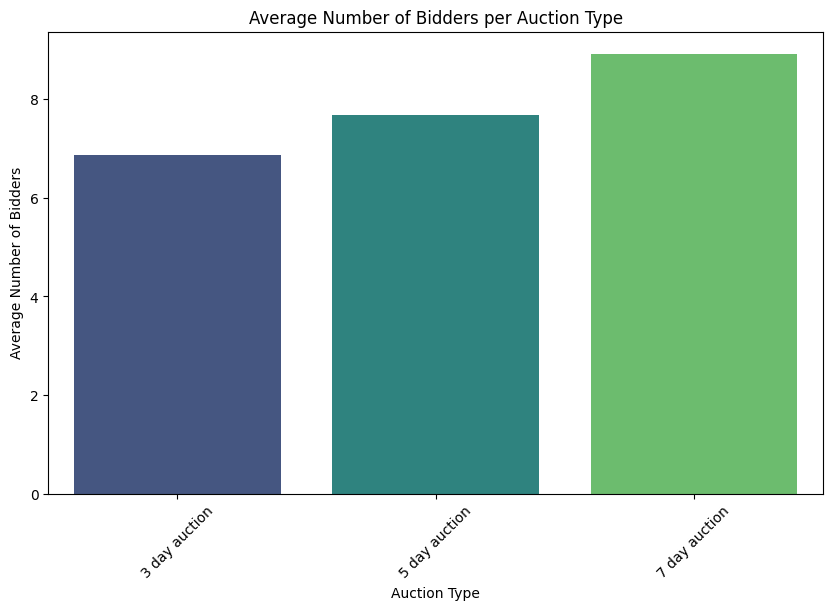

In [15]:
# Visualize the Results

# Create a bar plot to visualize the average number of bidders per auction type
plt.figure(figsize=(10, 6))
sns.barplot(x='auction_type', y='average_unique_bidders', data=average_bidders_per_auction_type, palette='viridis')

# Add labels and title
plt.xlabel('Auction Type')
plt.ylabel('Average Number of Bidders')
plt.title('Average Number of Bidders per Auction Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()